# Ridership analysis across months
Based on `01_ridership_exploration.ipynb` notebook, but with quarterly analysis. The goal is to observe for a particular bus route, if ridership has faced increase or decrease across months

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bus_routes = pd.read_json('../data/cleaned/BusRoutes.json', lines=True)
bus_ridership_quarter = pd.read_csv('../data/cleaned/BusRideVolume_2024_070809.csv', dtype={'PT_CODE': int})

In [3]:
bus_routes.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,10,SBST,1,1,75009,0.0,0500,2300,0500,2300,0500,2300
1,10,SBST,1,2,76059,0.6,0502,2302,0502,2302,0502,2302
2,10,SBST,1,3,76069,1.1,0504,2304,0504,2304,0503,2304
3,10,SBST,1,4,96289,2.3,0508,2308,0508,2309,0507,2308
4,10,SBST,1,5,96109,2.7,0509,2310,0509,2311,0508,2309


In [4]:
bus_ridership_quarter.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-07,WEEKDAY,19.0,BUS,46359,279,138
1,2024-07,WEEKDAY,6.0,BUS,64551,570,26
2,2024-07,WEEKDAY,9.0,BUS,92099,2009,866
3,2024-07,WEEKDAY,6.0,BUS,12201,51,1405
4,2024-07,WEEKDAY,17.0,BUS,77101,94,110


### Understanding the ridership data in general

In [5]:
average_ridership_by_stop = bus_ridership_quarter.groupby(['YEAR_MONTH', 'TIME_PER_HOUR', 'DAY_TYPE']).agg({
    'TOTAL_TAP_IN_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    'TOTAL_TAP_OUT_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
}).reset_index()
average_ridership_by_stop.columns = ['YEAR_MONTH', 'TIME_PER_HOUR', 'DAY_TYPE', 'TAP_IN_MEAN', 'TAP_IN_25', 'TAP_IN_75', 'TAP_OUT_MEAN', 'TAP_OUT_25', 'TAP_OUT_75']

In [6]:
average_ridership_by_stop.head()

,YEAR_MONTH,TIME_PER_HOUR,DAY_TYPE,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
0,2024-07,0.0,WEEKDAY,67.845101,3.0,37.0,98.928194,11.0,117.0
1,2024-07,0.0,WEEKENDS/HOLIDAY,32.158609,1.0,17.0,46.623582,6.0,56.0
2,2024-07,1.0,WEEKDAY,7.769004,0.0,5.0,17.827342,3.0,19.0
3,2024-07,1.0,WEEKENDS/HOLIDAY,3.555768,0.0,2.0,8.835564,2.0,10.0
4,2024-07,2.0,WEEKDAY,2.380952,0.0,2.0,5.428571,1.0,5.0


Plot ridership data by time of hour for tap in/tap out volume and whether or not it is a weekday

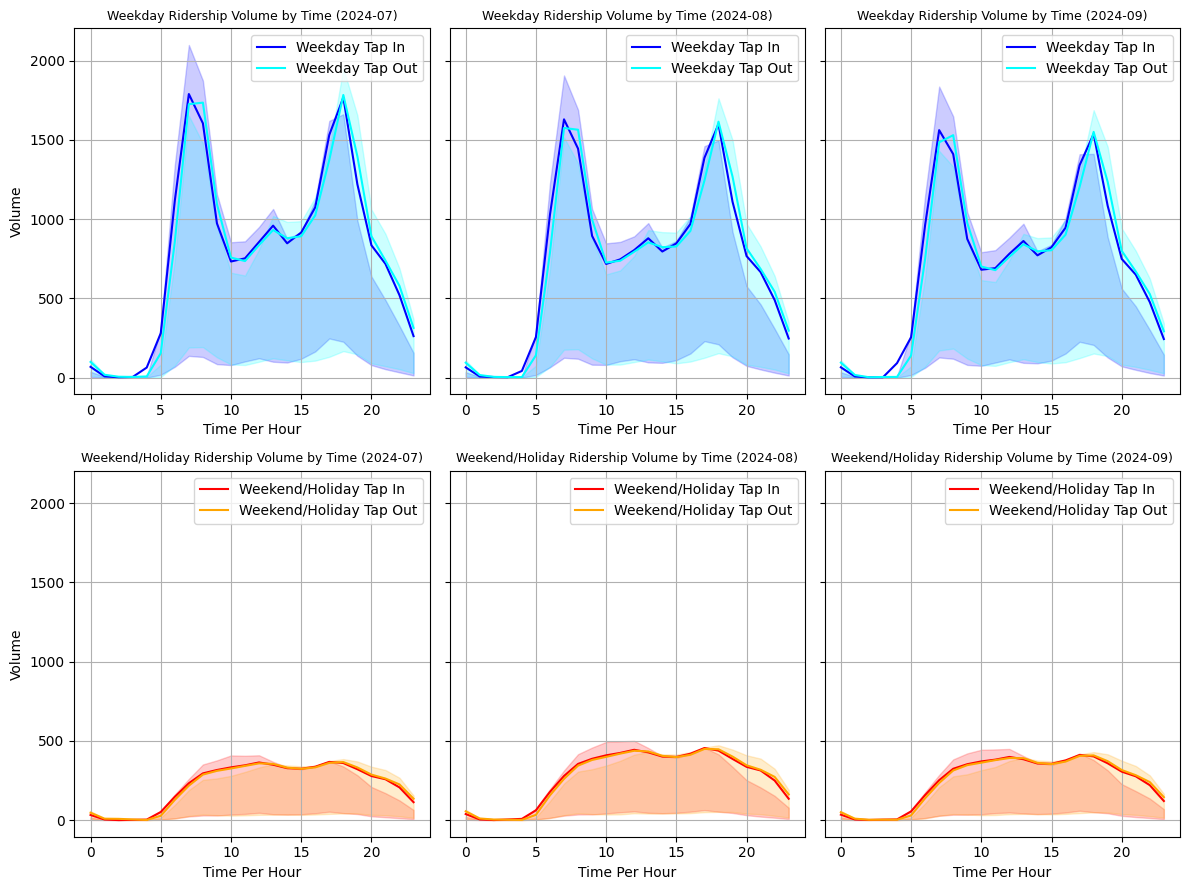

In [9]:
# Filter data for weekdays and weekends/holidays
weekdays = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKDAY']
weekends = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Get unique months
unique_months = average_ridership_by_stop['YEAR_MONTH'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(unique_months), figsize=(12, 9), sharey=True)

for i, month in enumerate(unique_months):
    # Filter data for the current month
    weekdays_month = weekdays[weekdays['YEAR_MONTH'] == month]
    weekends_month = weekends[weekends['YEAR_MONTH'] == month]
    
    # Plot for weekdays with shaded area
    axes[0, i].plot(weekdays_month['TIME_PER_HOUR'], weekdays_month['TAP_IN_MEAN'], label='Weekday Tap In', color='blue')
    axes[0, i].fill_between(weekdays_month['TIME_PER_HOUR'],
                            weekdays_month['TAP_IN_25'],
                            weekdays_month['TAP_IN_75'],
                            color='blue', alpha=0.2)
    axes[0, i].plot(weekdays_month['TIME_PER_HOUR'], weekdays_month['TAP_OUT_MEAN'], label='Weekday Tap Out', color='cyan')
    axes[0, i].fill_between(weekdays_month['TIME_PER_HOUR'],
                            weekdays_month['TAP_OUT_25'],
                            weekdays_month['TAP_OUT_75'],
                            color='cyan', alpha=0.2)
    
    # Add labels and title for weekdays plot
    axes[0, i].set_xlabel('Time Per Hour')
    if i == 0:
        axes[0, i].set_ylabel('Volume')
    axes[0, i].set_title(f'Weekday Ridership Volume by Time ({month})', fontsize=9)
    axes[0, i].legend()
    axes[0, i].grid(True)
    
    # Plot for weekends/holidays with shaded area
    axes[1, i].plot(weekends_month['TIME_PER_HOUR'], weekends_month['TAP_IN_MEAN'], label='Weekend/Holiday Tap In', color='red')
    axes[1, i].fill_between(weekends_month['TIME_PER_HOUR'],
                            weekends_month['TAP_IN_25'],
                            weekends_month['TAP_IN_75'],
                            color='red', alpha=0.2)
    axes[1, i].plot(weekends_month['TIME_PER_HOUR'], weekends_month['TAP_OUT_MEAN'], label='Weekend/Holiday Tap Out', color='orange')
    axes[1, i].fill_between(weekends_month['TIME_PER_HOUR'],
                            weekends_month['TAP_OUT_25'],
                            weekends_month['TAP_OUT_75'],
                            color='orange', alpha=0.2)
    
    # Add labels and title for weekends/holidays plot
    axes[1, i].set_xlabel('Time Per Hour')
    if i == 0:
        axes[1, i].set_ylabel('Volume')
    axes[1, i].set_title(f'Weekend/Holiday Ridership Volume by Time ({month})', fontsize=9)
    axes[1, i].legend()
    axes[1, i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Function to pivot the DataFrame
def pivot_ridership(df, metric):
    pivoted_df = df.pivot(index=['TIME_PER_HOUR', 'DAY_TYPE'], columns='YEAR_MONTH', values=[f'TAP_IN_{metric}', f'TAP_OUT_{metric}'])
    pivoted_df.columns = [f'{col[1]}_{col[0]}' for col in pivoted_df.columns]
    return pivoted_df.reset_index()


# Filter the DataFrame for each DAY_TYPE
weekday_df = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKDAY']
weekend_df = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Create tables for MEAN, 25th percentile, and 75th percentile for weekdays
weekday_mean_table = pivot_ridership(weekday_df, 'MEAN')
weekday_percentile_25_table = pivot_ridership(weekday_df, '25')
weekday_percentile_75_table = pivot_ridership(weekday_df, '75')

# Create tables for MEAN, 25th percentile, and 75th percentile for weekends/holidays
weekend_mean_table = pivot_ridership(weekend_df, 'MEAN')
weekend_percentile_25_table = pivot_ridership(weekend_df, '25')
weekend_percentile_75_table = pivot_ridership(weekend_df, '75')

weekday_mean_table

,TIME_PER_HOUR,DAY_TYPE,2024-07_TAP_IN_MEAN,2024-08_TAP_IN_MEAN,2024-09_TAP_IN_MEAN,2024-07_TAP_OUT_MEAN,2024-08_TAP_OUT_MEAN,2024-09_TAP_OUT_MEAN
0,0.0,WEEKDAY,67.845101,64.436203,64.845067,98.928194,94.064155,94.574234
1,1.0,WEEKDAY,7.769004,6.757167,7.057034,17.827342,15.998876,16.459533
2,2.0,WEEKDAY,2.380952,3.581395,1.422222,5.428571,4.465116,2.200000
3,3.0,WEEKDAY,3.866667,2.812500,2.263158,4.066667,3.250000,3.894737
4,4.0,WEEKDAY,63.263158,42.076923,91.360000,7.315789,3.057692,4.240000
5,5.0,WEEKDAY,280.171532,255.602539,254.516575,154.149013,140.614132,139.008287
6,6.0,WEEKDAY,1116.542221,1027.809495,962.709145,857.089211,788.269766,748.916302
7,7.0,WEEKDAY,1789.318889,1629.660114,1561.540822,1725.253890,1575.013564,1484.877828
8,8.0,WEEKDAY,1604.637833,1444.761502,1410.144993,1735.076256,1564.133700,1529.693488
9,9.0,WEEKDAY,973.341285,894.211864,874.922789,1094.371845,997.176192,975.758322


### Picking a bus route to analyse if ridership is lower for some of its BusStopCodes
We will look at route 193 again to identify how the trend changes across 3 months

In [11]:
CHOSEN_BUS = '193'
chosen_route = bus_routes[bus_routes['ServiceNo'] == CHOSEN_BUS]
chosen_route.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
8595,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330
8596,193,SMRT,1,2,22441,0.8,0548,2333,0548,2334,0548,2334
8597,193,SMRT,1,3,22591,1.1,0549,2334,0549,2335,0549,2335
8598,193,SMRT,1,4,22341,1.4,0550,2335,0550,2336,0550,2336
8599,193,SMRT,1,5,22351,1.8,0552,2337,0552,2338,0552,2338


In [15]:
merged_chosen_route = chosen_route.merge(bus_ridership_quarter, left_on='BusStopCode', right_on='PT_CODE')
merged_chosen_route.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-07,WEEKENDS/HOLIDAY,5.0,BUS,22009,1612,3214
1,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-07,WEEKENDS/HOLIDAY,1.0,BUS,22009,10,71
2,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-07,WEEKDAY,23.0,BUS,22009,28220,6805
3,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-07,WEEKDAY,11.0,BUS,22009,35387,51669
4,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-07,WEEKDAY,17.0,BUS,22009,122169,109818


In [19]:
ridership_chosen_route = merged_chosen_route.groupby(['YEAR_MONTH','BusStopCode', 'TIME_PER_HOUR', 'DAY_TYPE']).agg({
    'TOTAL_TAP_IN_VOLUME': 'sum',
    'TOTAL_TAP_OUT_VOLUME': 'sum',
}).reset_index()


ridership_chosen_route.columns = ['YEAR_MONTH','BusStopCode', 'TIME_PER_HOUR', 'DAY_TYPE', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME',]
ridership_chosen_route

,YEAR_MONTH,BusStopCode,TIME_PER_HOUR,DAY_TYPE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-07,22009,0.0,WEEKDAY,14664,3342
1,2024-07,22009,0.0,WEEKENDS/HOLIDAY,7654,1454
2,2024-07,22009,1.0,WEEKDAY,0,400
3,2024-07,22009,1.0,WEEKENDS/HOLIDAY,20,142
4,2024-07,22009,5.0,WEEKDAY,24582,48054
...,...,...,...,...,...,...
9150,2024-09,26209,21.0,WEEKENDS/HOLIDAY,0,2
9151,2024-09,26209,22.0,WEEKDAY,1,1
9152,2024-09,26209,22.0,WEEKENDS/HOLIDAY,1,4
9153,2024-09,26209,23.0,WEEKDAY,0,5


In [20]:
# Merge ridership_chosen_route with average_ridership_by_stop on TIME_PER_HOUR and DAY_TYPE
merged_ridership = ridership_chosen_route.merge(average_ridership_by_stop, on=['YEAR_MONTH', 'TIME_PER_HOUR', 'DAY_TYPE'])

# Filter BusStopCodes where TOTAL_TAP_IN_VOLUME mean in ridership_chosen_route is smaller than in average_ridership_by_stop
filtered_busstops = merged_ridership[
    (merged_ridership['TOTAL_TAP_IN_VOLUME'] < merged_ridership['TAP_IN_25']) &
    (merged_ridership['TOTAL_TAP_OUT_VOLUME'] < merged_ridership['TAP_OUT_25'])
    ]
#filtered_busstops['BusStopCode'].unique()
filtered_busstops

,YEAR_MONTH,BusStopCode,TIME_PER_HOUR,DAY_TYPE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
1,2024-07,22161,0.0,WEEKDAY,1,0,67.845101,3.0,37.0,98.928194,11.0,117.0
2,2024-07,22169,0.0,WEEKDAY,0,10,67.845101,3.0,37.0,98.928194,11.0,117.0
4,2024-07,22179,0.0,WEEKDAY,0,5,67.845101,3.0,37.0,98.928194,11.0,117.0
20,2024-07,23099,0.0,WEEKDAY,0,3,67.845101,3.0,37.0,98.928194,11.0,117.0
21,2024-07,23119,0.0,WEEKDAY,1,0,67.845101,3.0,37.0,98.928194,11.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9148,2024-09,25461,23.0,WEEKENDS/HOLIDAY,1,1,120.408891,6.0,69.0,144.639547,15.0,166.0
9149,2024-09,25511,23.0,WEEKENDS/HOLIDAY,3,0,120.408891,6.0,69.0,144.639547,15.0,166.0
9150,2024-09,25519,23.0,WEEKENDS/HOLIDAY,0,1,120.408891,6.0,69.0,144.639547,15.0,166.0
9151,2024-09,26201,23.0,WEEKENDS/HOLIDAY,2,0,120.408891,6.0,69.0,144.639547,15.0,166.0


In [ ]:
# Merging the datasets based on BusStopCode, TIME_PER_HOUR, and DAY_TYPE, adding StopSequence and Direction
merged_data = pd.merge(
    filtered_busstops,
    merged_chosen_route,
    how="inner",
    left_on=["YEAR_MONTH", "BusStopCode", "TIME_PER_HOUR", "DAY_TYPE", 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME'],
    right_on=["YEAR_MONTH", "BusStopCode", "TIME_PER_HOUR", "DAY_TYPE", 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']
)

# Selecting relevant columns
merged_data = merged_data[[
    'ServiceNo', 'Operator', 'Direction', 'StopSequence', 'BusStopCode', 'Distance', 
    'YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME',
    'TAP_IN_MEAN', 'TAP_IN_25', 'TAP_IN_75', 'TAP_OUT_MEAN', 'TAP_OUT_25', 'TAP_OUT_75'
]]

# Displaying the merged result
print("Merged Data with Stop Sequence and Direction:")
merged_data

Merged Data with Stop Sequence and Direction:


,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
0,193,SMRT,2,33,22161,12.5,2024-07,WEEKDAY,0.0,1,0,67.845101,3.0,37.0,98.928194,11.0,117.0
1,193,SMRT,1,11,22169,3.7,2024-07,WEEKDAY,0.0,0,10,67.845101,3.0,37.0,98.928194,11.0,117.0
2,193,SMRT,1,10,22179,3.3,2024-07,WEEKDAY,0.0,0,5,67.845101,3.0,37.0,98.928194,11.0,117.0
3,193,SMRT,2,31,23099,12.0,2024-07,WEEKDAY,0.0,0,3,67.845101,3.0,37.0,98.928194,11.0,117.0
4,193,SMRT,2,29,23119,11.6,2024-07,WEEKDAY,0.0,1,0,67.845101,3.0,37.0,98.928194,11.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,193,SMRT,2,6,25461,2.0,2024-09,WEEKENDS/HOLIDAY,23.0,1,1,120.408891,6.0,69.0,144.639547,15.0,166.0
5080,193,SMRT,2,10,25511,3.8,2024-09,WEEKENDS/HOLIDAY,23.0,3,0,120.408891,6.0,69.0,144.639547,15.0,166.0
5081,193,SMRT,1,34,25519,12.5,2024-09,WEEKENDS/HOLIDAY,23.0,0,1,120.408891,6.0,69.0,144.639547,15.0,166.0
5082,193,SMRT,2,7,26201,2.3,2024-09,WEEKENDS/HOLIDAY,23.0,2,0,120.408891,6.0,69.0,144.639547,15.0,166.0


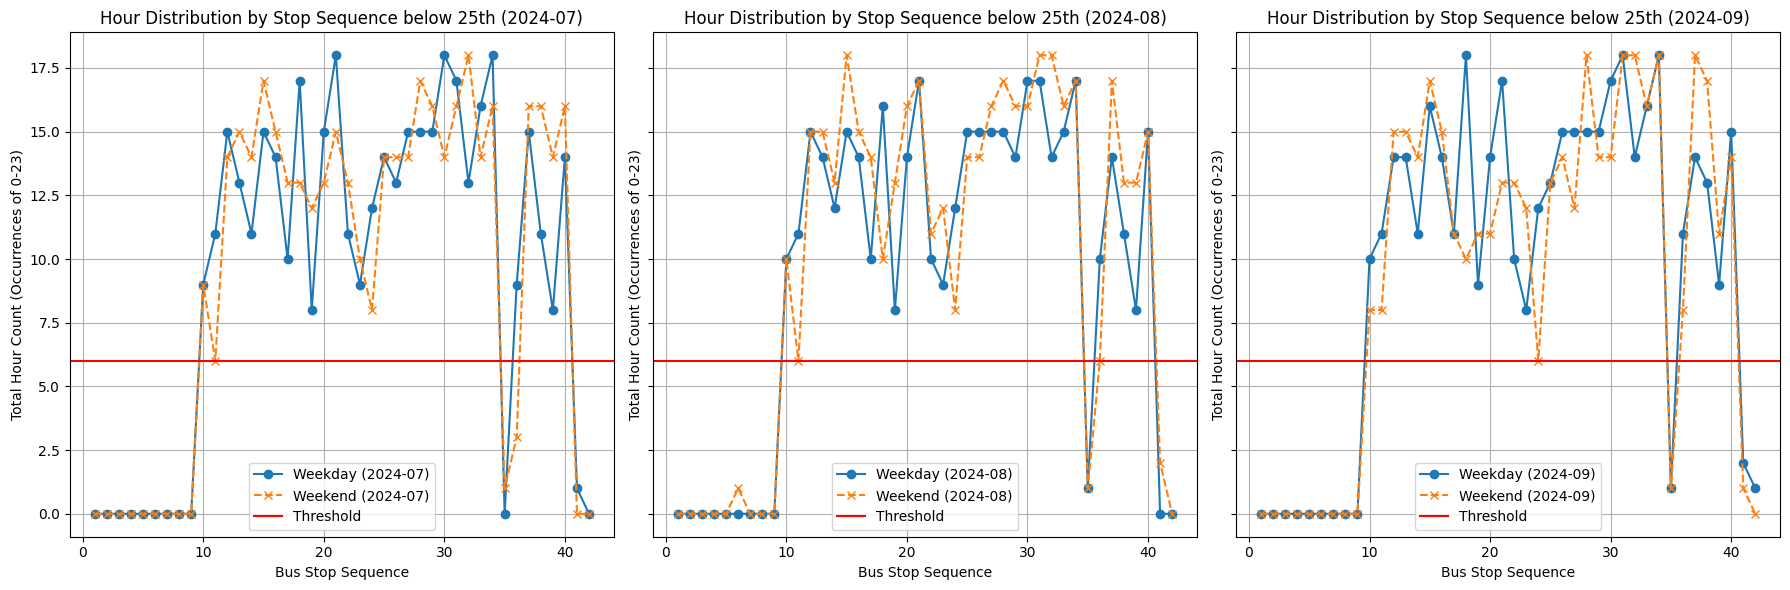

Percentage of stop sequences exceeding 6 in Weekday: 71.43%
Percentage of stop sequences exceeding 6 in Weekend: 67.46%


In [22]:
# Step 1: Count occurrences of each TIME_PER_HOUR per StopSequence, DAY_TYPE, Direction, and YEAR_MONTH
hour_counts = (
    merged_data.groupby(['StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH'])
    .size()
    .reset_index(name='Total_Hour_Count')
)

# Step 2: Generate all StopSequence, DAY_TYPE, Direction, and YEAR_MONTH combinations for filling missing values
max_sequence = merged_data['StopSequence'].max()
directions = merged_data['Direction'].unique()
day_types = merged_data['DAY_TYPE'].unique()
year_months = merged_data['YEAR_MONTH'].unique()
full_index = pd.MultiIndex.from_product(
    [range(1, max_sequence + 1), day_types, directions, year_months], 
    names=['StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH']
)

# Step 3: Reindex hour_counts to include all combinations, filling missing values with 0
hour_counts = hour_counts.set_index(['StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH']).reindex(full_index, fill_value=0).reset_index()

# Step 4: Separate data by day type
weekday_data = hour_counts[hour_counts['DAY_TYPE'] == 'WEEKDAY']
weekend_data = hour_counts[hour_counts['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Step 5: Filter only direction 1 as we are only interested in direction 1
weekday_data_dir1 = weekday_data[weekday_data['Direction'] == 1]

weekend_data_dir1 = weekend_data[weekend_data['Direction'] == 1]


# Plotting function for both directions on the same graph
def plot_hour_distribution(data_weekday, data_weekend, title):
    fig, axes = plt.subplots(nrows=1, ncols=len(year_months), figsize=(18, 6), sharey=True)
    
    for i, year_month in enumerate(year_months):
        data_weekday_month = data_weekday[data_weekday['YEAR_MONTH'] == year_month]
        data_weekend_month = data_weekend[data_weekend['YEAR_MONTH'] == year_month]
        
        # Plot Direction 1
        axes[i].plot(data_weekday_month['StopSequence'], data_weekday_month['Total_Hour_Count'], label=f"Weekday ({year_month})", marker='o')
        
        # Plot Direction 2 with reversed StopSequence
        axes[i].plot(data_weekend_month['StopSequence'], data_weekend_month['Total_Hour_Count'], label=f"Weekend ({year_month})", marker='x', linestyle='--')
        
        axes[i].axhline(y=6, color='r', linestyle='-', label='Threshold')
        
        # Adding labels and title
        axes[i].set_xlabel("Bus Stop Sequence")
        axes[i].set_ylabel("Total Hour Count (Occurrences of 0-23)")
        axes[i].set_title(f"{title} ({year_month})")
        axes[i].legend()
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot for weekdays with both directions
plot_hour_distribution(weekday_data_dir1, weekend_data_dir1, "Hour Distribution by Stop Sequence below 25th")


# Define threshold
threshold = 6

# Calculate total sequences and sequences exceeding threshold for each direction
total_sequences_weekday = weekday_data_dir1.shape[0]
exceeding_sequences_weekday = weekday_data_dir1[weekday_data_dir1['Total_Hour_Count'] > threshold].shape[0]

total_sequences_weekend = weekend_data_dir1.shape[0]
exceeding_sequences_weekend = weekend_data_dir1[weekend_data_dir1['Total_Hour_Count'] > threshold].shape[0]

# Calculate percentages
percentage_exceed_weekday = (exceeding_sequences_weekday / total_sequences_weekday) * 100 if total_sequences_weekday else 0
percentage_exceed_weekend = (exceeding_sequences_weekend / total_sequences_weekend) * 100 if total_sequences_weekend else 0

# Display the results
print(f"Percentage of stop sequences exceeding {threshold} in Weekday: {percentage_exceed_weekday:.2f}%")
print(f"Percentage of stop sequences exceeding {threshold} in Weekend: {percentage_exceed_weekend:.2f}%")
